In [44]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.integrate import solve_ivp
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import PillowWriter


In [45]:
m1 = 1
m2 = 333000 # Sun 333000x heavier than earth
x1_0 = 1 # inititial position is one earth-sun distance away from the sun
y1_0 = 0
x2_0 = 0
y2_0 = 0
vx1_0 = 0
vy1_0 = np.sqrt(m2) # Circular motion v=sqrt(a*r) with a = m2 (since g=1, r12=1)
vx2_0 = 0
vy2_0 = 0


In [46]:
def dSdt(S, t):
    x1, y1, x2, y2, vx1, vy1, vx2, vy2 = S
    r12 = np.sqrt((x2-x1)**2 +(y2-y1)**2)
    return [ vx1,
            vy1,
            vx2,
            vy2,
            m2/r12**3 * (x2-x1),
            m2/r12**3 * (y2-y1),
            m1/r12**3 * (x1-x2),
            m1/r12**3 * (y1-y2),
            ]

In [47]:
t = np.linspace(0,1,10000)

In [48]:
sol = odeint(dSdt, y0=[x1_0,y1_0,x2_0,y2_0,vx1_0,vy1_0,vx2_0,vy2_0],
             t = t)

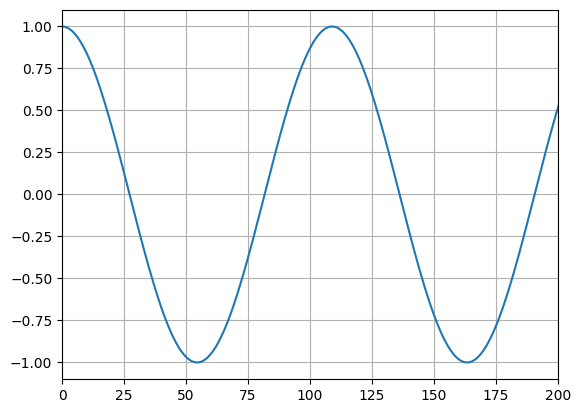

In [49]:
plt.plot(sol.T[0])
plt.xlim(0, 200)
plt.grid()

In [50]:
# get the time in units of years
#1) Conver to seconds (SI unit) using equation above
tt = 1/np.sqrt(6.67e-11 * 5.97e24 / (1.5e11) ** 3)
#2) Convert from seconds to years
tt = tt / (60*60*24*365.25) * np.diff(t)[0] # per time step (in years)


In [51]:
#get solution
x1 = sol.T[0]
y1 = sol.T[1]
x2 = sol.T[2]
y2 = sol.T[3]


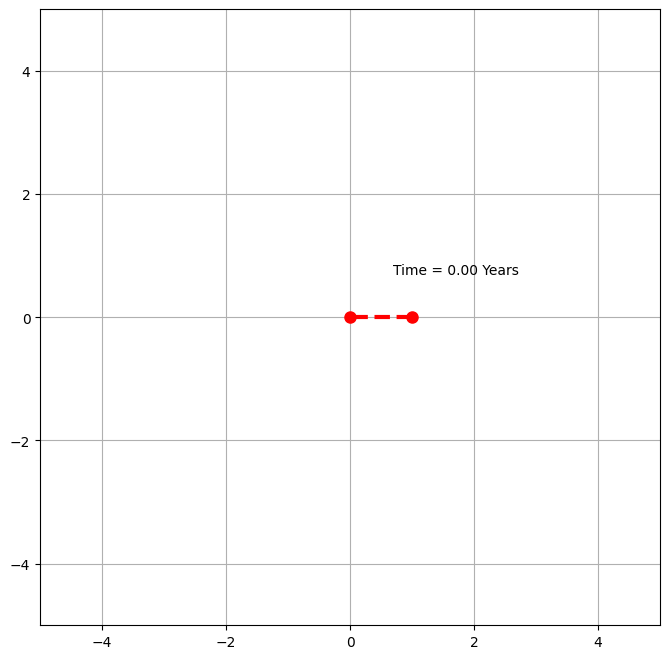

In [52]:
# Make animation 
def animate(i):
    ln1.set_data([x1[i], x2[i]], [y1[i], y2[i]])
    text.set_text('Time = {:.2f} Years'.format(i*tt))   
fig, ax = plt.subplots(1,1, figsize=(8,8))
ax.grid()
ln1, = plt.plot([],[], "ro--", lw=3, markersize = 8)
text = plt.text(0.7,0.7, '')
ax.set_ylim(-5, 5)
ax.set_xlim(-5, 5)
ani = animation.FuncAnimation(fig, animate, frames=200, interval=50)
ani.save("plain.gif", writer="pillow", fps=30)


# 3Body Problem